In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.constants import e, h, c
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator

In [7]:
# Data Import

file_path = Path('Data/task 1.2.2')

data = pd.read_csv(file_path, sep=r'\s+', header=None, skiprows=17)
data = data.rename(columns={0: 'Wavelength', 1: 'Intensity (raw)'})
data['Intensity'] = data['Intensity (raw)'] / data['Intensity (raw)'].max()
# For debugging
# display(data.head())



### Raw Spectrum Data Plot
The plot for the actual emission spectrum as seen on scientific databases is below

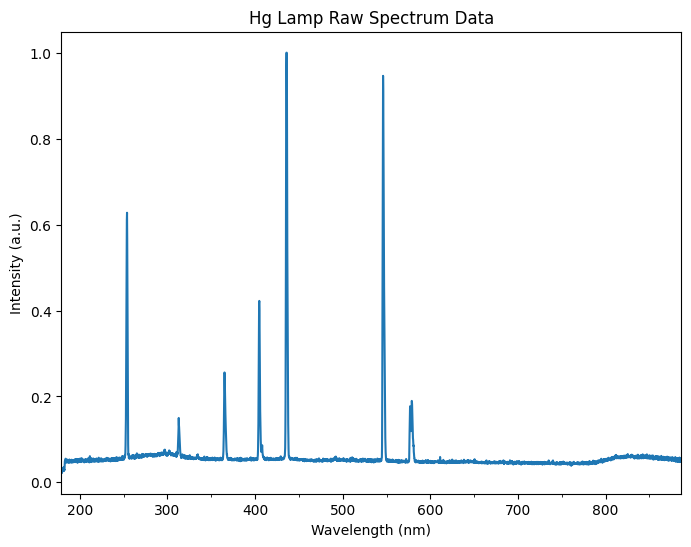

In [8]:
# Preliminary Plot
x, y = data['Wavelength'], data['Intensity']
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label='Spectrum')
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.set(xlabel='Wavelength (nm)', ylabel='Intensity (a.u.)', title='Hg Lamp Raw Spectrum Data')

ax.set_xlim(x.iloc[0], x.iloc[-1])

plt.show()

In [9]:
# Find peaks with the find_peaks function from scipy.signal
x, y = data['Wavelength'], data['Intensity']
threshold = 0.1
peaks_idx, props = find_peaks(y, height=threshold, distance=100)

# Extract corresponding x and y values
peaks_x = x.iloc[peaks_idx]
peaks_y = y.iloc[peaks_idx]
peaks = pd.DataFrame({'Wavelength': peaks_x, 'Intensity': peaks_y})
peaks = peaks.reset_index(drop=True)
display(peaks)

print(f'Peak calculation threshold is {threshold * 100} percent.')

,Wavelength,Intensity
0,253.84,0.627531
1,312.86,0.149906
2,365.08,0.255781
3,404.78,0.422344
4,435.95,1.000000
5,546.05,0.946156
6,578.79,0.189625


Peak calculation threshold is 10.0 percent.


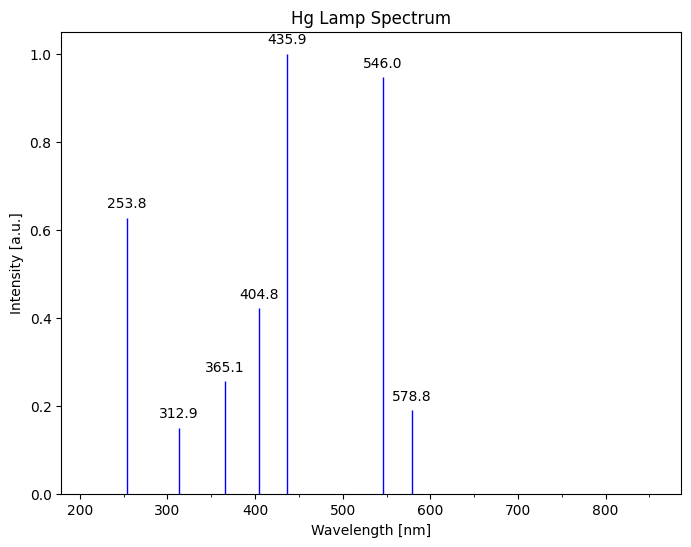

In [10]:
# Preliminary Plot

fig, ax = plt.subplots(figsize=(8, 6))
for _, row in peaks.iterrows():
    ax.vlines(x=row["Wavelength"], ymin=0, ymax=row["Intensity"], color='blue', linewidth=1)
ax.set_xlim(x.iloc[0], x.iloc[-1])
ax.set_ylim(bottom=0)
ax.set(xlabel="Wavelength [nm]", ylabel="Intensity [a.u.]", title='Hg Lamp Spectrum')
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(50))
# for m, I in zip(peaks_mass_unk_4, peaks_unk_4):
#     ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
#         xy=(m, I),           # point to annotate
#         xytext=(0, 5),       # (x-offset, y-offset) in points
#         textcoords='offset points',
#         ha='center',         # horizontal alignment
#         va='bottom',         # vertical alignment
#         fontsize=8,
#         rotation=70)         # slanted like your sample

for u, I in zip(peaks_x, peaks_y):
    ax.annotate(f'{u:.1f}',
                xy=(u, I),
                xytext=(0,5),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=10,
                rotation=0
                )
    

# ax.plot(x, y, label='Spectrum')
# ax.scatter(peaks_x, peaks_y, color='red', label='Peaks')

plt.show()

In [24]:
from scipy.constants import c, h
energies = h * c * 6.242e18 * 10**9/ peaks_x
print(f'Transition Energies: \n{energies}')

Transition Energies: 
351     4.884729
631     3.963241
882     3.396350
1075    3.063243
1228    2.844224
1780    2.270744
1948    2.142296
Name: Wavelength, dtype: float64


In [19]:
print(type(energies))

<class 'pandas.core.series.Series'>


$^3P_{1} \rightarrow\ ^1S_{0}$<br>
$^3D \rightarrow\ ^3P$<br>
$^3S_{1} \rightarrow\ ^3P_{2}$<br>
$^3S_{1} \rightarrow\ ^3P_{1}$<br>
$^3S_{1} \rightarrow\ ^3P_{2}$<br>
$^3D \rightarrow\ ^3P$<br>
$^3D \rightarrow\ ^3P$<br>
